In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.svm import SVC
%matplotlib inline

In [2]:
# reading the csv file
df=pd.read_csv('E_Commerce.csv')


In [3]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
df.isna().sum()
# from the isna function we can see that there is no column which is having a null or inapproprate value so we can go ahead

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [12]:
#columns with  it accepts no arguments and returns a new featureless
instance that has no instance attributes and cannot be given any.
df.describe(include=np.object)

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [ ]:
# from the above analysis we can see that
# Customer gender apears to be evenly distributed with about 50.4% female.

# About 48% of product importance are classified as low.

# About 68% of Mode of Shipment is via Ship,others are by Flight and Road.

In [14]:

df.describe(include=np.number)

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [16]:
#checking the gender column
df['Gender'].value_counts()
# gender are distributed evenly

F    5545
M    5454
Name: Gender, dtype: int64

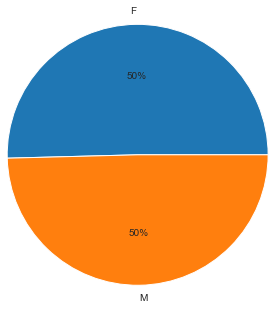

In [41]:
gender=df['Gender'].value_counts()
gender.plot(kind='pie',radius=1.5,autopct='%1.0f%%')
plt.show()

In [26]:
df[["Gender", "Customer_care_calls"]].groupby(['Gender'],as_index= False).mean().sort_values(by='Customer_care_calls', ascending = False)

,Gender,Customer_care_calls
1,M,4.057389
0,F,4.051578


In [27]:
df[["Gender", "Customer_rating"]].groupby(['Gender'],as_index= False).mean().sort_values(by='Customer_rating', ascending = False)

,Gender,Customer_rating
1,M,2.994499
0,F,2.986655


In [29]:
df[["Gender", "Prior_purchases"]].groupby(['Gender'],as_index= False).mean().sort_values(by='Prior_purchases', ascending = False)

,Gender,Prior_purchases
0,F,3.581785
1,M,3.553172


In [33]:
df[["Gender", "Reached.on.Time_Y.N"]].groupby(['Gender'],as_index= False).mean()

,Gender,Reached.on.Time_Y.N
0,F,0.594409
1,M,0.599010


In [ ]:
# from the above analysis of gender we can see that the gender is distributed evenly for every feature in the dataset

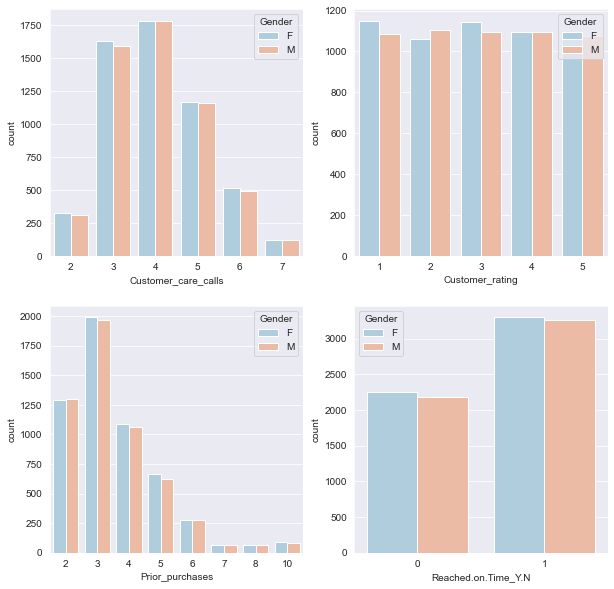

In [36]:

sb.set_style('darkgrid')

f,axes= plt.subplots(2,2, figsize=(10,10))

sb.countplot(x='Customer_care_calls',hue='Gender',data=df,palette='RdBu_r', ax=axes[0,0])
sb.countplot(x='Customer_rating',hue='Gender',data=df,palette='RdBu_r', ax=axes[0,1])
sb.countplot(x='Prior_purchases',hue='Gender',data=df,palette='RdBu_r', ax=axes[1,0])
sb.countplot(x='Reached.on.Time_Y.N',hue='Gender',data=df,palette='RdBu_r', ax=axes[1,1])


sb.set_style('whitegrid')

In [ ]:
# Now exploring Warehouse_block

In [37]:
df['Warehouse_block'].value_counts()

F    3666
D    1834
B    1833
A    1833
C    1833
Name: Warehouse_block, dtype: int64

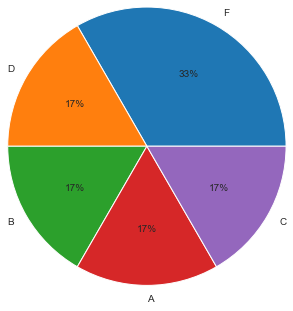

In [40]:
Warehouse_block=df['Warehouse_block'].value_counts()
Warehouse_block.plot(kind='pie',radius=1.6,autopct='%1.0f%%')
plt.show()

In [ ]:
# Now exploring Mode_of_Shipment

In [43]:
df['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

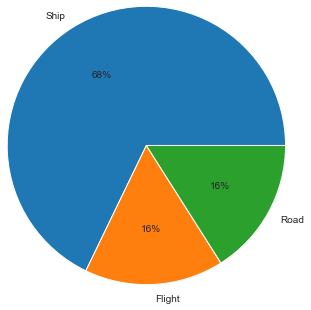

In [44]:
Mode_of_Shipment=df['Mode_of_Shipment'].value_counts()
Mode_of_Shipment.plot(kind='pie',radius=1.6,autopct='%1.0f%%')
plt.show()

In [45]:
# from above we can see that ship is the most prefered choice for shipment

In [46]:
df['Customer_care_calls'].value_counts()

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64

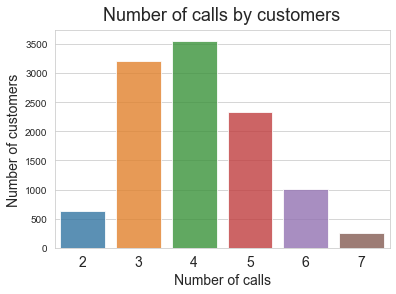

<Figure size 720x504 with 0 Axes>

In [47]:
call_rate=df['Customer_care_calls'].value_counts()

sb.barplot(x=call_rate.index, y=call_rate.values, alpha=0.8)
plt.title('Number of calls by customers', fontsize=18, pad=10)
plt.ylabel('Number of customers', fontsize=14)
plt.xlabel('Number of calls', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.figure(figsize=(10, 7))
plt.show()

In [48]:
# Explore by Customer Rating
df['Customer_rating'].value_counts() 

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

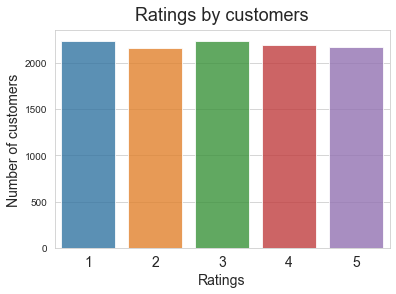

<Figure size 720x504 with 0 Axes>

In [49]:
rating=df['Customer_rating'].value_counts()

sb.barplot(x=rating.index, y=rating.values, alpha=0.8)
plt.title('Ratings by customers', fontsize=18, pad=10)
plt.ylabel('Number of customers', fontsize=14)
plt.xlabel('Ratings', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.figure(figsize=(10, 7))
plt.show()

In [51]:

# Explore by prior purchases
df['Prior_purchases'].value_counts()

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

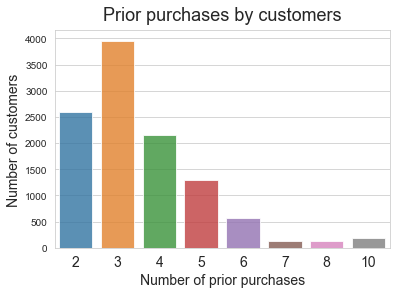

<Figure size 720x504 with 0 Axes>

In [52]:
prior_purchases=df['Prior_purchases'].value_counts()

sb.barplot(x=prior_purchases.index, y=prior_purchases.values, alpha=0.8)
plt.title('Prior purchases by customers', fontsize=18, pad=10)
plt.ylabel('Number of customers', fontsize=14)
plt.xlabel('Number of prior purchases', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.figure(figsize=(10, 7))
plt.show()

In [54]:
df['Product_importance'].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

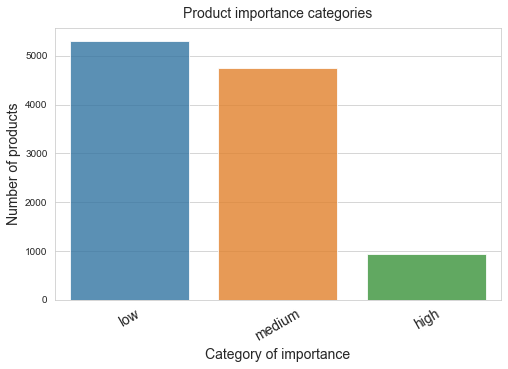

In [55]:
importance = df['Product_importance'].value_counts()

plt.figure(figsize=(8, 5))

sb.barplot(x=importance.index, y=importance.values, alpha=0.8)
plt.title('Product importance categories', fontsize=14, pad=10)
plt.ylabel('Number of products', fontsize=14)
plt.xlabel('Category of importance', fontsize=14)
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=10)
plt.show()

In [4]:
#dropping id column in the datset
df=df.drop(['ID'],axis=1)


In [5]:
df.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
#applying label encoding in the columns Warehouse_block, Mode_of_Shipment, Product_importance, Gender

In [7]:
le_Warehouse_block=LabelEncoder()
le_Mode_of_Shipment=LabelEncoder()
le_Product_importance=LabelEncoder()
le_Gender=LabelEncoder()

In [8]:
df['Warehouse_block_n']=le_Warehouse_block.fit_transform(df['Warehouse_block'])
df['Mode_of_Shipment_n']=le_Mode_of_Shipment.fit_transform(df['Mode_of_Shipment'])
df['Product_importance_n']=le_Product_importance.fit_transform(df['Product_importance'])
df['Gender_n']=le_Gender.fit_transform(df['Gender'])


In [9]:
df.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_n,Mode_of_Shipment_n,Product_importance_n,Gender_n
0,D,Flight,4,2,177,3,low,F,44,1233,1,3,0,1,0
1,F,Flight,4,5,216,2,low,M,59,3088,1,4,0,1,1
2,A,Flight,2,2,183,4,low,M,48,3374,1,0,0,1,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1,1,0,2,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1,2,0,2,0


In [74]:
# dropping the old columns of Gender,Product_importance,Mode_of_Shipment

In [10]:
new_df=df.drop(['Warehouse_block','Gender','Product_importance','Mode_of_Shipment'],axis=1)

In [11]:
new_df.head(4)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_n,Mode_of_Shipment_n,Product_importance_n,Gender_n
0,4,2,177,3,44,1233,1,3,0,1,0
1,4,5,216,2,59,3088,1,4,0,1,1
2,2,2,183,4,48,3374,1,0,0,1,1
3,3,3,176,4,10,1177,1,1,0,2,1


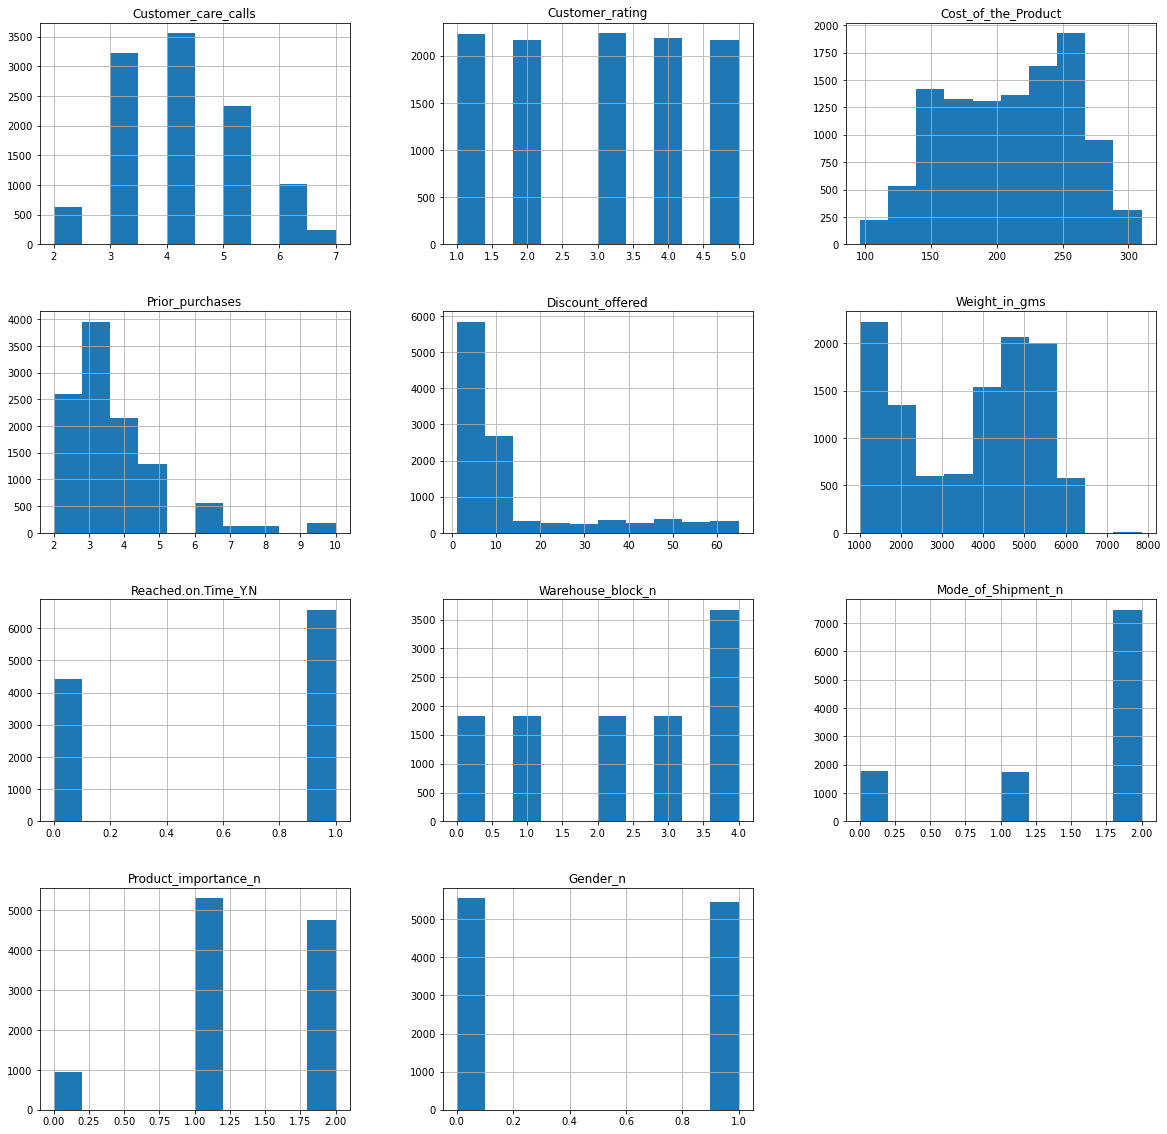

In [12]:
# visualization of the dataset using histogram
new_df.hist(figsize = (20,20))
plt.show()

In [78]:
# from the above histograms we can see that

#  Reached.on.Time_Y.N column:- above 6000 products reached on time and around 4500 product does not reached on time

# Gender :-48 % are male and 52% are female

# mode_of_shipment:-around 1800 by flight around 1800 by ship and 7500 by road

# dicount_offered :-maximum discount we given around 10-15 %

# rating :- all rating are equal

In [13]:
# dividing the dependent and independent variables
X=new_df.drop(['Reached.on.Time_Y.N'],axis=1)
X[:5]

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_n,Mode_of_Shipment_n,Product_importance_n,Gender_n
0,4,2,177,3,44,1233,3,0,1,0
1,4,5,216,2,59,3088,4,0,1,1
2,2,2,183,4,48,3374,0,0,1,1
3,3,3,176,4,10,1177,1,0,2,1
4,2,2,184,3,46,2484,2,0,2,0


In [14]:
Reached_on_Time_Y_N=new_df['Reached.on.Time_Y.N']
Reached_on_Time_Y_N[:5]

0    1
1    1
2    1
3    1
4    1
Name: Reached.on.Time_Y.N, dtype: int64

In [109]:
# now diving the dataset into test train 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,Reached_on_Time_Y_N,test_size=.2,random_state=10)

In [16]:
len(X_train)

8799

In [17]:
len(X_test)

2200

In [20]:
# creating a pipline for the svc model
pipe=Pipeline([
    ('scaler ',StandardScaler()),('svc',SVC(kernel='rbf',C=10))
])

In [21]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler ', StandardScaler()), ('svc', SVC(C=10))])

In [22]:
pipe.score(X_test,y_test)
# score is around 67%

0.6672727272727272

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.72      0.64       895
           1       0.77      0.63      0.69      1305

    accuracy                           0.67      2200
   macro avg       0.67      0.68      0.67      2200
weighted avg       0.69      0.67      0.67      2200



In [84]:
# applying Decision tree model to the dataset
model=tree.DecisionTreeClassifier()

In [85]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
model.score(X_test,y_test)
# score is around 65%

0.6522727272727272

In [87]:
Reached_on_Time_Y_N_predicted=model.predict(X_test)
Reached_on_Time_Y_N_predicted

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [88]:
cm=confusion_matrix(y_test,Reached_on_Time_Y_N_predicted)
cm

array([[484, 411],
       [354, 951]], dtype=int64)

Text(70.0, 0.5, 'actual')

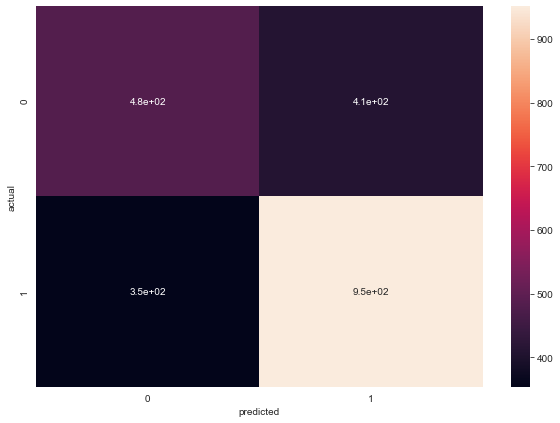

In [89]:
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [90]:
# applying Random_forest

In [91]:
model2=RandomForestClassifier(n_estimators=100)



In [92]:
model2.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
model2.score(X_test,y_test)
# score is around 66%

0.6663636363636364

In [94]:
Reached_on_Time_Y_N_predicted=model2.predict(X_test)
Reached_on_Time_Y_N_predicted

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [95]:
cm=confusion_matrix(y_test,Reached_on_Time_Y_N_predicted)
cm

array([[608, 287],
       [447, 858]], dtype=int64)

Text(70.0, 0.5, 'actual')

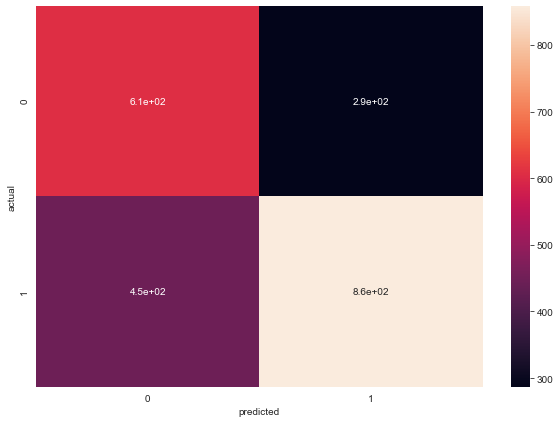

In [96]:
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [146]:
# applying KNN 

In [97]:

model3= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
 

In [98]:
model3.fit(X_train, y_train) 

KNeighborsClassifier()

In [99]:
model3.score(X_test,y_test)
# score is around 65%

0.6522727272727272

In [100]:
Reached_on_Time_Y_N_predicted=model3.predict(X_test)
Reached_on_Time_Y_N_predicted

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [101]:
cm=confusion_matrix(y_test,Reached_on_Time_Y_N_predicted)
cm

array([[518, 377],
       [388, 917]], dtype=int64)

Text(70.0, 0.5, 'actual')

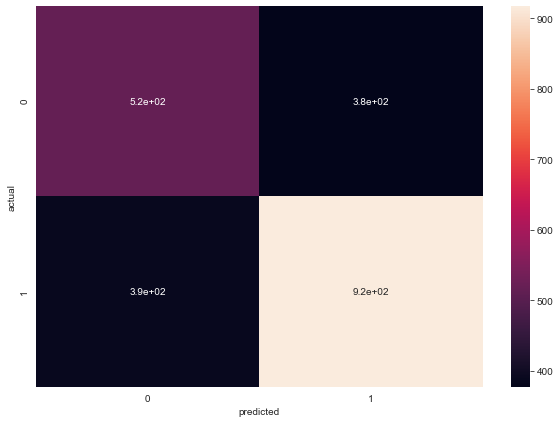

In [102]:
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [103]:
#Naive Bayes
model4=GaussianNB()

In [104]:
model4.fit(X_train, y_train) 

GaussianNB()

In [105]:
model3.score(X_test,y_test)

0.6522727272727272

In [106]:
Reached_on_Time_Y_N_predicted=model4.predict(X_test)
Reached_on_Time_Y_N_predicted

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [107]:
cm=confusion_matrix(y_test,Reached_on_Time_Y_N_predicted)
cm

array([[878,  17],
       [710, 595]], dtype=int64)

Text(70.0, 0.5, 'actual')

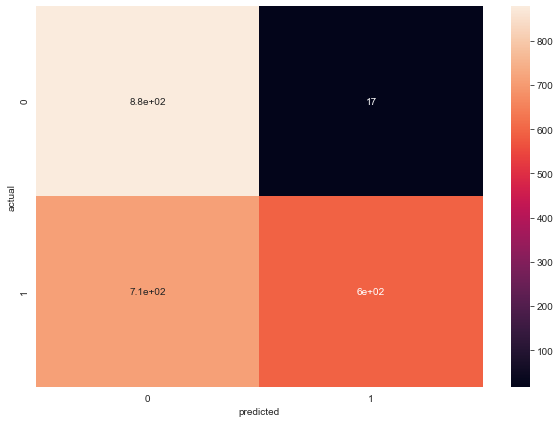

In [108]:
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [26]:
# applying gridsearch cv using pipline so that we can identify the accuracy and best parameters in each model
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline




In [67]:

model_params = {

    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    },
    'Decision_tree': {
        'model': tree.DecisionTreeClassifier(),
        'params' : {
           
        }
    },
    'Naive_bayes': {
        'model': GaussianNB(),
        'params' : {
            
        }
    },
     'KNN': {
        'model':  KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ),
        'params' : {
            
        }
    },
    
    
}

In [68]:
scores = []
best_estimators = {}## will contain the dictionary of trained model 

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

,model,best_score,best_params
0,random_forest,0.656439,{'randomforestclassifier__n_estimators': 100}
1,logistic_regression,0.634959,{'logisticregression__C': 10}
2,Decision_tree,0.634276,{}
3,Naive_bayes,0.647460,{}
4,KNN,0.644050,{}


In [ ]:
# from the above table we can se that almost all the model are having similar score for the given dataset 